In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
datos_clima =  pd.read_pickle("etlData/datos_clima.pickle")
datos_clima.index

DatetimeIndex(['2017-01-05 19:00:00-05:00', '2017-01-06 19:00:00-05:00',
               '2017-01-07 19:00:00-05:00', '2017-01-08 19:00:00-05:00',
               '2017-01-09 19:00:00-05:00', '2017-01-10 19:00:00-05:00',
               '2017-01-11 19:00:00-05:00', '2017-02-05 19:00:00-05:00',
               '2017-02-06 19:00:00-05:00', '2017-02-07 19:00:00-05:00',
               ...
               '2023-11-20 00:00:00-05:00', '2023-11-21 00:00:00-05:00',
               '2023-11-22 00:00:00-05:00', '2023-11-23 00:00:00-05:00',
               '2023-11-24 00:00:00-05:00', '2023-11-25 00:00:00-05:00',
               '2023-11-26 00:00:00-05:00', '2023-11-27 00:00:00-05:00',
               '2023-11-28 00:00:00-05:00', '2023-11-29 00:00:00-05:00'],
              dtype='datetime64[ns, pytz.FixedOffset(-300)]', name='Date', length=2300, freq=None)

In [4]:
producciones =  pd.read_pickle("etlData/producciones.pickle")
producciones

Cantidad       Fecha  Id_Area  Id_Lote      Variedad
30 2021   13805.0  2021-12-04       11       30  Tommy Atkins
   2020   11497.0  2020-12-03       11       30  Tommy Atkins
   2022    9019.0  2022-11-30       11       30  Tommy Atkins
   2023    8848.0  2023-12-01       11       30  Tommy Atkins
32 2022   11420.0  2022-12-21       12       32  Tommy Atkins
   2021   14792.0  2021-11-29       12       32  Tommy Atkins
   2020   11464.0  2020-12-02       12       32  Tommy Atkins
   2023    9072.0  2023-11-30       12       32  Tommy Atkins
33 2020    1677.0  2020-12-04       13       33       Ataulfo
   2023    1450.0  2023-12-03       13       33       Ataulfo
   2021    2907.0  2021-11-28       13       33       Ataulfo
   2022    1350.0  2022-12-03       13       33       Ataulfo

In [5]:
corr_promedios = datos_clima.resample("Y").mean().corr()
corr_promedios

,Temp_Air_Mean,Temp_Air_Min,Temp_Air_Max,Dew_Temp_Mean,Relat_Hum_Mean,Relat_Hum_Min,Relat_Hum_Max,Wind_Speed_Mean,Wind_Speed_Min,Wind_Speed_Max
Temp_Air_Mean,1.000000,0.760859,0.882154,0.842968,-0.268624,0.529919,-0.448743,-0.074110,0.340494,-0.165697
Temp_Air_Min,0.760859,1.000000,0.786435,0.810662,0.327386,0.018638,0.144057,-0.347230,-0.254558,0.390087
Temp_Air_Max,0.882154,0.786435,1.000000,0.723771,0.028807,0.118542,-0.055578,-0.312791,0.028151,0.160799
Dew_Temp_Mean,0.842968,0.810662,0.723771,1.000000,0.111727,0.476441,-0.236424,-0.186847,-0.006987,0.062681
Relat_Hum_Mean,-0.268624,0.327386,0.028807,0.111727,1.000000,-0.714046,0.901681,-0.434455,-0.991081,0.918255
Relat_Hum_Min,0.529919,0.018638,0.118542,0.476441,-0.714046,1.000000,-0.945319,0.375482,0.772476,-0.774257
Relat_Hum_Max,-0.448743,0.144057,-0.055578,-0.236424,0.901681,-0.945319,1.000000,-0.458183,-0.929986,0.891205
Wind_Speed_Mean,-0.074110,-0.347230,-0.312791,-0.186847,-0.434455,0.375482,-0.458183,1.000000,0.377933,-0.217454
Wind_Speed_Min,0.340494,-0.254558,0.028151,-0.006987,-0.991081,0.772476,-0.929986,0.377933,1.000000,-0.939430
Wind_Speed_Max,-0.165697,0.390087,0.160799,0.062681,0.918255,-0.774257,0.891205,-0.217454,-0.939430,1.000000


In [6]:
import numpy as np

def show_matrix(data, x_tick_labels=None, y_tick_labels=None, colormap="RdBu"):
    fig, ax = plt.subplots(figsize=(13, 8), ncols=1)
    pos = ax.imshow(data, cmap=colormap, interpolation='none', )
    for (j,i),label in np.ndenumerate(data):
        ax.text(i,j,round(label,3),ha='center',va='center')
    cbar = fig.colorbar(pos, ax=ax, extend='both')
    cbar.minorticks_on()
    if x_tick_labels is not None:
        ax.set_xticks(np.arange(0,len(x_tick_labels)))
        ax.set_xticklabels(x_tick_labels)
    if y_tick_labels is not None:
        ax.set_yticks(np.arange(0,len(y_tick_labels)))
        ax.set_yticklabels(y_tick_labels)
    plt.show()

In [7]:
import numpy as np

def show_correlation_matrix(data):
    show_matrix(data.corr())

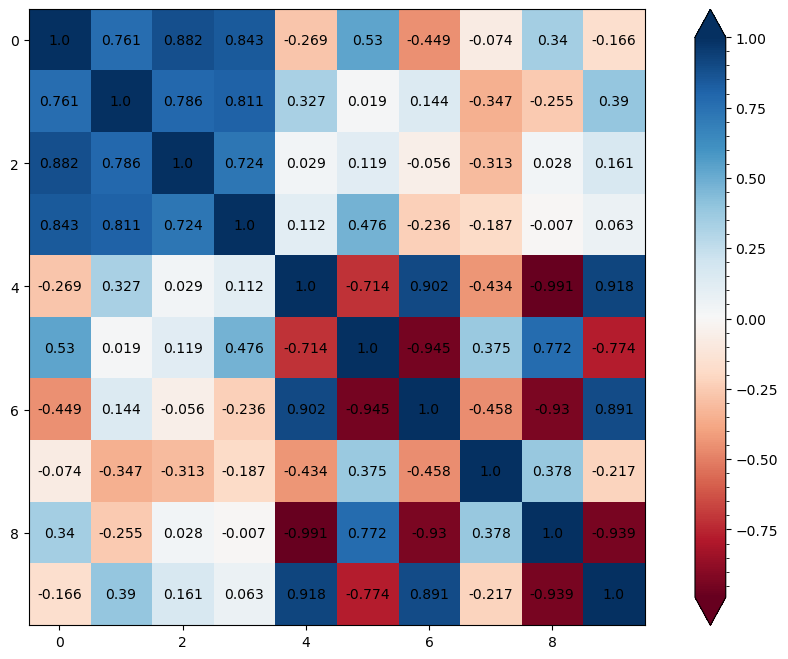

In [8]:
show_correlation_matrix(datos_clima.resample("Y").mean())

In [9]:
from datetime import datetime

In [10]:
x = datos_clima.resample("Y").mean()[datetime(2020,1,1):]
x

/tmp/ipykernel_585/815163422.py:1: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  x = datos_clima.resample("Y").mean()[datetime(2020,1,1):]


,Temp_Air_Mean,Temp_Air_Min,Temp_Air_Max,Dew_Temp_Mean,Relat_Hum_Mean,Relat_Hum_Min,Relat_Hum_Max,Wind_Speed_Mean,Wind_Speed_Min,Wind_Speed_Max
Date,,,,,,,,,,
2020-12-31 00:00:00-05:00,25.185706,21.579307,32.092853,21.167895,80.083102,51.911357,95.285319,1.311385,0.000000,6.249529
2021-12-31 00:00:00-05:00,24.789749,21.532508,31.293918,21.237555,82.473354,55.360502,96.000000,0.634953,0.000000,4.984169
2022-12-31 00:00:00-05:00,24.146771,20.744800,30.510371,18.922629,67.148571,44.865714,92.354286,1.230943,0.469114,4.391000
2023-12-31 00:00:00-05:00,25.348348,21.168168,31.141141,21.243243,54.066066,87.912913,56.378378,1.555556,1.096096,2.435435


In [11]:
y = producciones["Cantidad"]
y

30  2021    13805.0
    2020    11497.0
    2022     9019.0
    2023     8848.0
32  2022    11420.0
    2021    14792.0
    2020    11464.0
    2023     9072.0
33  2020     1677.0
    2023     1450.0
    2021     2907.0
    2022     1350.0
Name: Cantidad, dtype: float64

In [12]:
y_por_variedad = producciones.groupby(
    ["Variedad", producciones["Fecha"].apply(lambda f: f[:4])], 
    as_index=False
).sum(numeric_only=True)
y_por_variedad

,Variedad,Cantidad,Id_Area,Id_Lote
0,Ataulfo,1677.0,13,33
1,Ataulfo,2907.0,13,33
2,Ataulfo,1350.0,13,33
3,Ataulfo,1450.0,13,33
4,Tommy Atkins,22961.0,23,62
5,Tommy Atkins,28597.0,23,62
6,Tommy Atkins,20439.0,23,62
7,Tommy Atkins,17920.0,23,62


In [13]:
from math import ceil

def show_correlation_plots(x, y):
    fig, axes = plt.subplots(figsize=(10,10), ncols=3, nrows=ceil(len(x.columns)/3))
    for i, column in enumerate(x.columns):
        axis = axes[i // 3][i % 3]
        axis.plot(x[column].sort_values(), y)
        axis.title.set_text(column)
    plt.tight_layout()
    plt.show()

In [14]:
x

,Temp_Air_Mean,Temp_Air_Min,Temp_Air_Max,Dew_Temp_Mean,Relat_Hum_Mean,Relat_Hum_Min,Relat_Hum_Max,Wind_Speed_Mean,Wind_Speed_Min,Wind_Speed_Max
Date,,,,,,,,,,
2020-12-31 00:00:00-05:00,25.185706,21.579307,32.092853,21.167895,80.083102,51.911357,95.285319,1.311385,0.000000,6.249529
2021-12-31 00:00:00-05:00,24.789749,21.532508,31.293918,21.237555,82.473354,55.360502,96.000000,0.634953,0.000000,4.984169
2022-12-31 00:00:00-05:00,24.146771,20.744800,30.510371,18.922629,67.148571,44.865714,92.354286,1.230943,0.469114,4.391000
2023-12-31 00:00:00-05:00,25.348348,21.168168,31.141141,21.243243,54.066066,87.912913,56.378378,1.555556,1.096096,2.435435


In [15]:
producciones["Variedad"].unique()

array(['Tommy Atkins', 'Ataulfo'], dtype=object)

Variedad =  Tommy Atkins


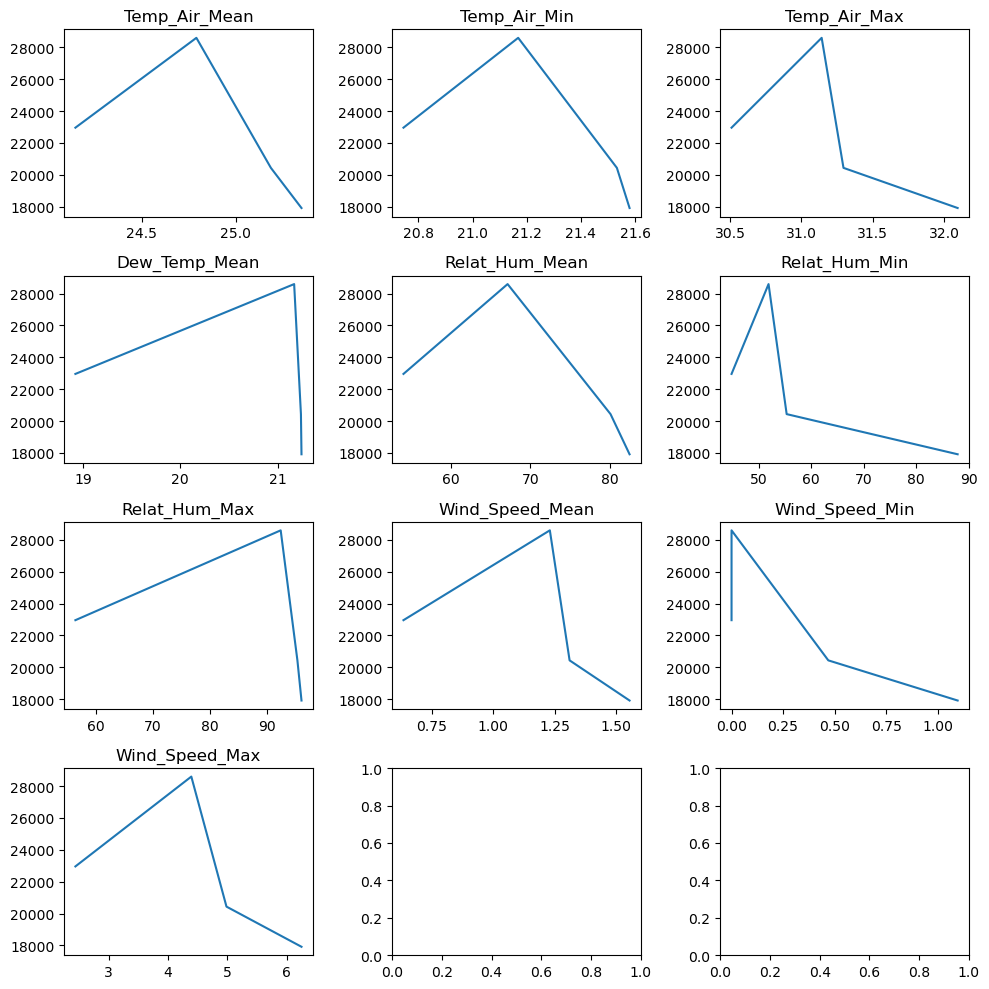

Variedad =  Ataulfo


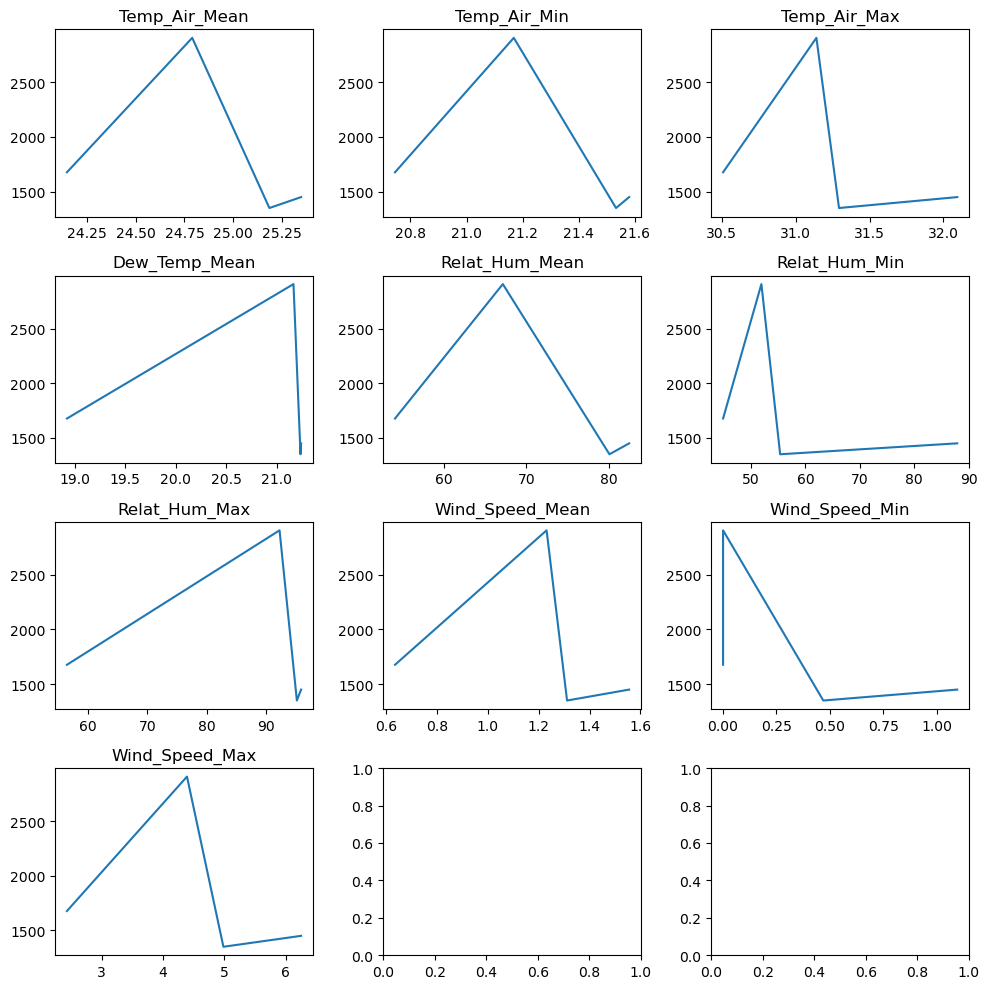

In [16]:
for variedad in producciones["Variedad"].unique():
    _y = y_por_variedad.loc[y_por_variedad["Variedad"] == variedad]
    print("Variedad = ",variedad)
    show_correlation_plots(x, _y["Cantidad"])

In [17]:
#import sys, importlib
#importlib.reload(sys.modules['graphics'])
from graphics import freq_bar_ranges

In [18]:
def show_barcharts_each_var(x):
    fig, axes = plt.subplots(figsize=(10,10), ncols=3, nrows=ceil(len(x.columns)/3))
    for i, column in enumerate(x.columns):
        axis = axes[i // 3][i % 3]
        #axis.bar(x[column], y)
        freq_bar_ranges(x[column].values, 5, ax=axis)
        axis.title.set_text(column)
    plt.tight_layout()
    plt.show()

Tommy Atkins


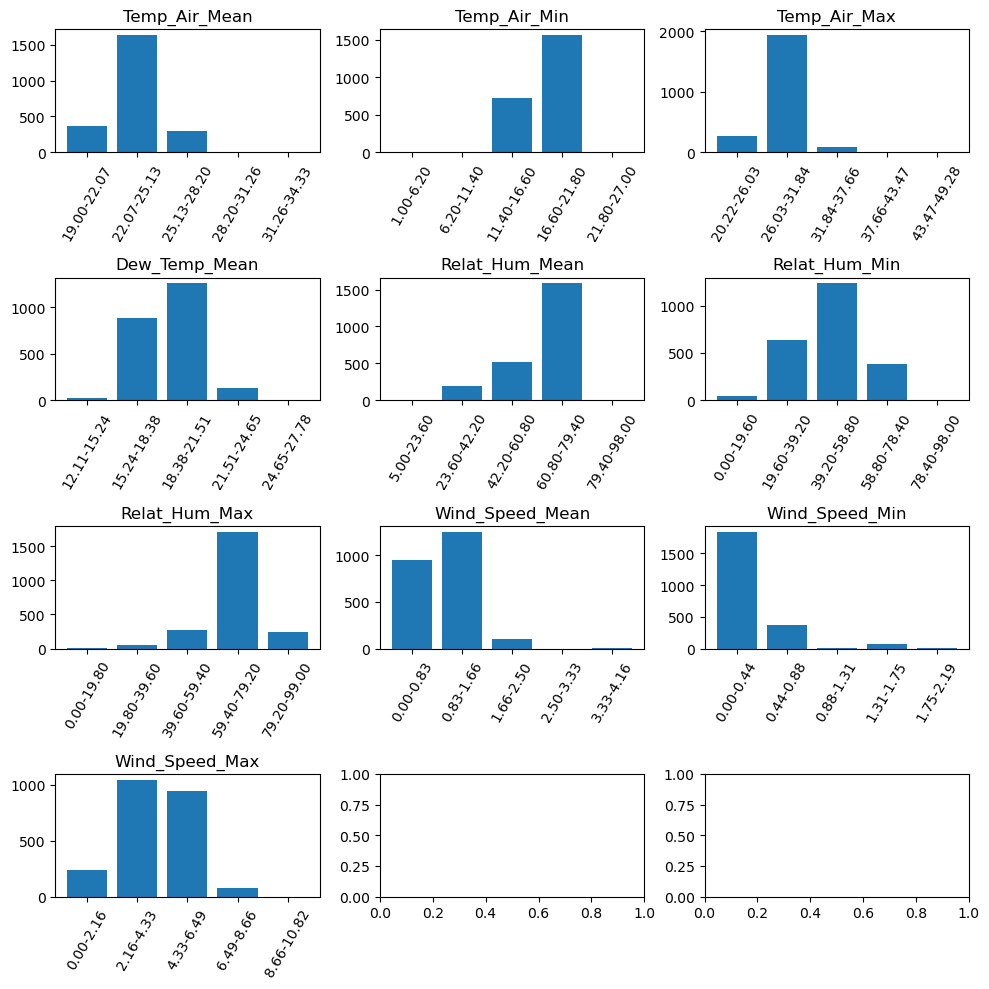

Ataulfo


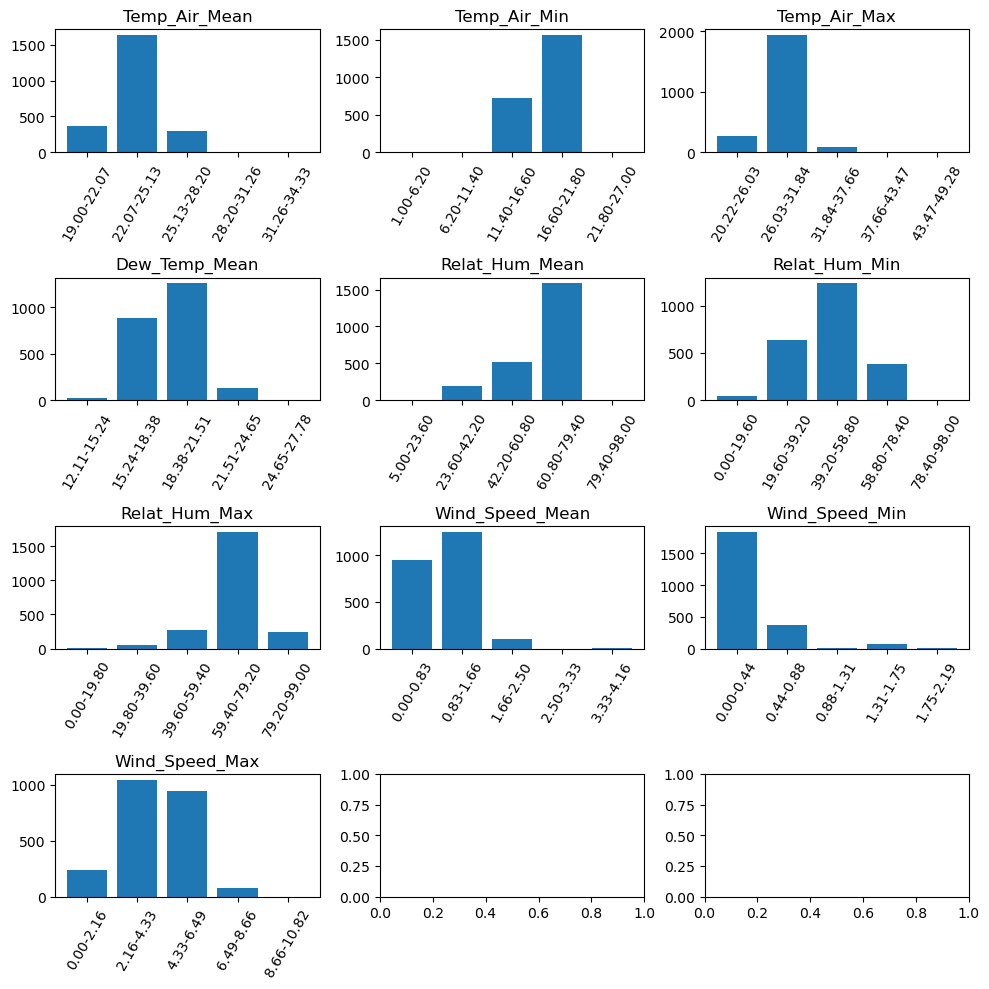

In [19]:
for variedad in producciones["Variedad"].unique():
    print(variedad)
    _y = y_por_variedad.loc[y_por_variedad["Variedad"] == variedad]
    show_barcharts_each_var(datos_clima)

In [20]:
import numpy as np

def corr_with_predictor(x,y):
    size = len(x.columns)
    output = np.zeros((size,))
    for i,column in enumerate(x.columns):
        output[i] = np.corrcoef([x[column], y],)[0,1]
    return output

In [21]:
def corr_with_predictors(x_matrix,y_matrix, groupby, y_target):
    y_indices = y_matrix[groupby].unique()
    output = np.zeros((len(x.columns),len(y_indices)))
    for i,y_index in enumerate(y_indices):
        output[:,i] = corr_with_predictor(x,y_matrix[y_matrix[groupby] == y_index][y_target])
    return pd.DataFrame(output, index=x.columns, columns=y_indices)

In [22]:
y_por_variedad["Variedad"].unique()

array(['Ataulfo', 'Tommy Atkins'], dtype=object)

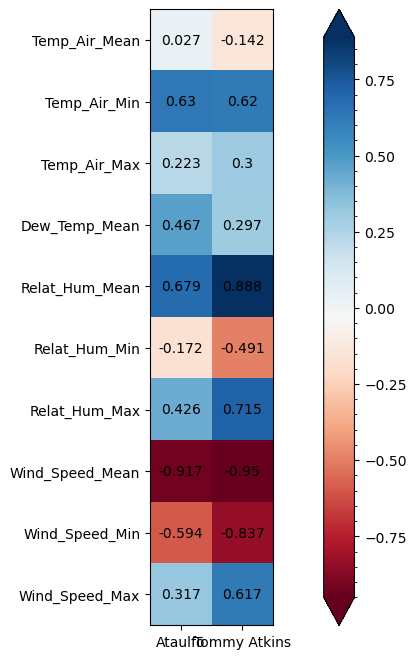

In [23]:
groupby = "Variedad"
y_target = "Cantidad"
corr_matrix = corr_with_predictors(x, y_por_variedad, groupby, y_target)
show_matrix(corr_matrix, y_tick_labels=x.columns, x_tick_labels=y_por_variedad["Variedad"].unique())

In [24]:
y_por_variedad[y_por_variedad["Variedad"] == "Tommy Atkins"]

,Variedad,Cantidad,Id_Area,Id_Lote
4,Tommy Atkins,22961.0,23,62
5,Tommy Atkins,28597.0,23,62
6,Tommy Atkins,20439.0,23,62
7,Tommy Atkins,17920.0,23,62


In [25]:
corr_with_predictor(x, y_por_variedad[y_por_variedad["Variedad"] == "Tommy Atkins"]["Cantidad"])

array([-0.1424738 ,  0.61996225,  0.30045557,  0.29659015,  0.88837034,
       -0.49137079,  0.71536488, -0.95011109, -0.83665722,  0.61741474])

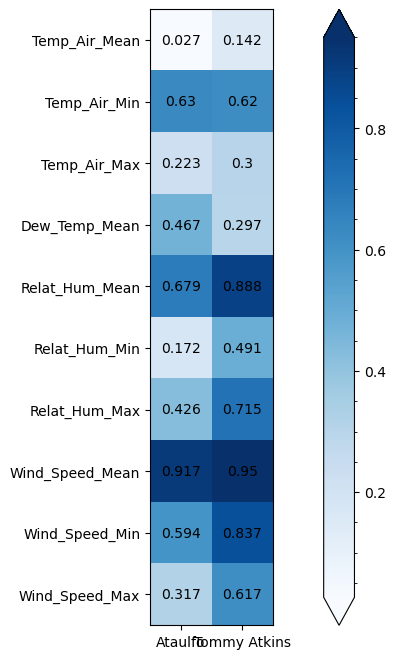

In [26]:
show_matrix(corr_matrix.abs(), y_tick_labels=x.columns, colormap="Blues",
    x_tick_labels=y_por_variedad["Variedad"].unique()
)

In [27]:
columna = "Tommy Atkins"
values = corr_matrix[columna].abs().sort_values(ascending=False)[corr_matrix[columna].abs() > 0.66]
values

Wind_Speed_Mean    0.950111
Relat_Hum_Mean     0.888370
Wind_Speed_Min     0.836657
Relat_Hum_Max      0.715365
Name: Tommy Atkins, dtype: float64

In [28]:
variables_tommy = values.index.values
variables_tommy

array(['Wind_Speed_Mean', 'Relat_Hum_Mean', 'Wind_Speed_Min',
       'Relat_Hum_Max'], dtype=object)

In [29]:
columna = "Ataulfo"
values = corr_matrix[columna].abs().sort_values(ascending=False)[corr_matrix[columna].abs() > 0.66]
values

Wind_Speed_Mean    0.917175
Relat_Hum_Mean     0.679456
Name: Ataulfo, dtype: float64

In [30]:
variables_ataulfo = values.index.values
variables_ataulfo

array(['Wind_Speed_Mean', 'Relat_Hum_Mean'], dtype=object)

In [31]:
import pickle as pkl

variables_seleccionadas = {
    "Tommy Atkins": variables_tommy,
    "Ataulfo": variables_ataulfo,
}
with open("variablesSeleccionadas.pkl", "wb") as f:
    f.write(pkl.dumps(variables_seleccionadas))
variables_seleccionadas

{'Tommy Atkins': array(['Wind_Speed_Mean', 'Relat_Hum_Mean', 'Wind_Speed_Min',
        'Relat_Hum_Max'], dtype=object),
 'Ataulfo': array(['Wind_Speed_Mean', 'Relat_Hum_Mean'], dtype=object)}

In [32]:
def sort_columns_by_corr(x,y):
    corr = corr_with_predictor(x,y)
    return pd.DataFrame(corr, x.columns).sort_values(ascending=False,by=0,key=abs)

In [33]:
def argsort_all_columns(data, ascending=True, key=None):
    factor = 0 if not ascending else -len(data)+1
    def _key(value):
        if key is None:
            return value
        return key(value)
    df = pd.DataFrame()
    for i,column in enumerate(data.columns):
        df[column] = (factor + data[column].map(_key).argsort()).abs()
    return df

In [34]:
import timeseries as ts

In [35]:
!pip install pmdarima

In [36]:
from pmdarima.arima import auto_arima

In [37]:
variable = "Wind_Speed_Mean"

In [54]:
data = datos_clima["Wind_Speed_Mean"].resample("M").mean()
autoARIMA = auto_arima(data, seasonal=True, m=12)
autoARIMA.fit(data)
autoARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   83
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                  21.600
Date:                              Tue, 23 Jul 2024   AIC                            -33.201
Time:                                      03:44:09   BIC                            -21.107
Sample:                                  01-31-2017   HQIC                           -28.342
                                       - 11-30-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0055      0.015      0.360      0.719      -0.025       0.036
ar.L1          0.8947      0.055     16.298      0.000       0.787       1.002
ar.S.L12       0.9619      0.103      9.323      0.000       0.760       1.164
ma.S.L12      -0.7630      0.308     -2.474      0.013      -1.367      -0.159
sigma2         0.0303      0.006      5.147      0.000       0.019       0.042
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 2.43
Prob(Q):                              0.82   Prob(JB):                         0.30
Heteroskedasticity (H):               1.63   Skew:                            -0.40
Prob(H) (two-sided):                  0.20   Kurtosis:                         3.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
def sarimax_predict(sarimax, n_periods):
    forecast_auto, conf_int_auto = sarimax.predict(n_periods=12, return_conf_int=True)
    df = pd.DataFrame(
        {
            "min": conf_int_auto.T[0],
            "value": forecast_auto.values,
            "max": conf_int_auto.T[1],
        },
        index=forecast_auto.index
    )
    return df

In [40]:
predictions = sarimax_predict(autoARIMA, 12)
predictions

,min,value,max
2023-12-31 00:00:00-05:00,1.535396,1.878083,2.220771
2024-01-31 00:00:00-05:00,1.106887,1.566432,2.025978
2024-02-29 00:00:00-05:00,0.798688,1.333506,1.868324
2024-03-31 00:00:00-05:00,0.662947,1.251104,1.839261
2024-04-30 00:00:00-05:00,0.669582,1.297162,1.924743
2024-05-31 00:00:00-05:00,0.716342,1.373760,2.031178
2024-06-30 00:00:00-05:00,0.759100,1.439437,2.119775
2024-07-31 00:00:00-05:00,0.732378,1.430493,2.128607
2024-08-31 00:00:00-05:00,0.957803,1.669794,2.381785
2024-09-30 00:00:00-05:00,1.057849,1.780714,2.503579


In [41]:
def sarimax_plot(train, results, test=None):
    # TODO Plot tests. 
    # Get forecast and confidence intervals
    values = results["value"]

    # Plot forecast with training data
    ax = train.plot(figsize=(13,5), color="black")
    values.plot(ax=ax, color="green")
    if test is not None:
        test.plot(ax=ax, color="Red")
    ax.fill_between(results.index, 
        results["min"], results["max"], 
        color='green', alpha=0.5
    )
    plt.legend(
        [
            'Training', 
            'Forecast', 
            "Test", 
            'Confidence'
        ], loc='upper left'
    )
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.grid(alpha=0.5)
    plt.autoscale()
    plt.show()
    return ax

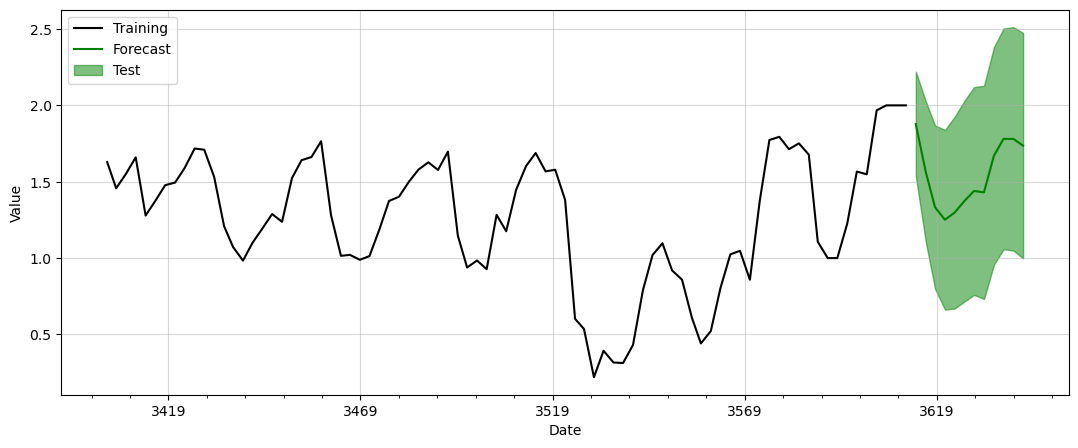

<Axes: xlabel='Date', ylabel='Value'>

In [42]:
sarimax_plot(data, predictions)

In [43]:
cutoff = datetime(2022,6,2)

In [44]:
train,test = ts.train_test_split(data, cutoff)

/Notebooks/timeseries.py:5: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  train = timeseries.loc[:cutoff]
/Notebooks/timeseries.py:6: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  test = timeseries.loc[cutoff:]


In [45]:
autoARIMA = auto_arima(train, seasonal=True, m=12)
autoARIMA.fit(train)
autoARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   65
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 12)   Log Likelihood                  18.588
Date:                              Mon, 22 Jul 2024   AIC                            -29.176
Time:                                      22:30:08   BIC                            -20.540
Sample:                                  01-31-2017   HQIC                           -25.774
                                       - 05-31-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0916      0.142     -0.646      0.518      -0.369       0.186
ar.S.L12       0.9929      0.088     11.303      0.000       0.821       1.165
ma.S.L12      -0.8845      0.694     -1.274      0.203      -2.245       0.476
sigma2         0.0255      0.013      1.972      0.049       0.000       0.051
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.89
Prob(Q):                              0.91   Prob(JB):                         0.39
Heteroskedasticity (H):               1.72   Skew:                            -0.39
Prob(H) (two-sided):                  0.22   Kurtosis:                         3.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
predictions = sarimax_predict(autoARIMA, 12)
predictions

,min,value,max
2022-06-30 00:00:00-05:00,0.725092,1.048266,1.371440
2022-07-31 00:00:00-05:00,0.693912,1.130528,1.567145
2022-08-31 00:00:00-05:00,0.759041,1.286701,1.814361
2022-09-30 00:00:00-05:00,0.784993,1.390030,1.995066
2022-10-31 00:00:00-05:00,0.740596,1.414188,2.087780
2022-11-30 00:00:00-05:00,0.654683,1.390470,2.126256
2022-12-31 00:00:00-05:00,0.467701,1.260820,2.053939
2023-01-31 00:00:00-05:00,0.053530,0.900101,1.746672
2023-02-28 00:00:00-05:00,-0.102236,0.793809,1.689853
2023-03-31 00:00:00-05:00,-0.181113,0.761813,1.704739


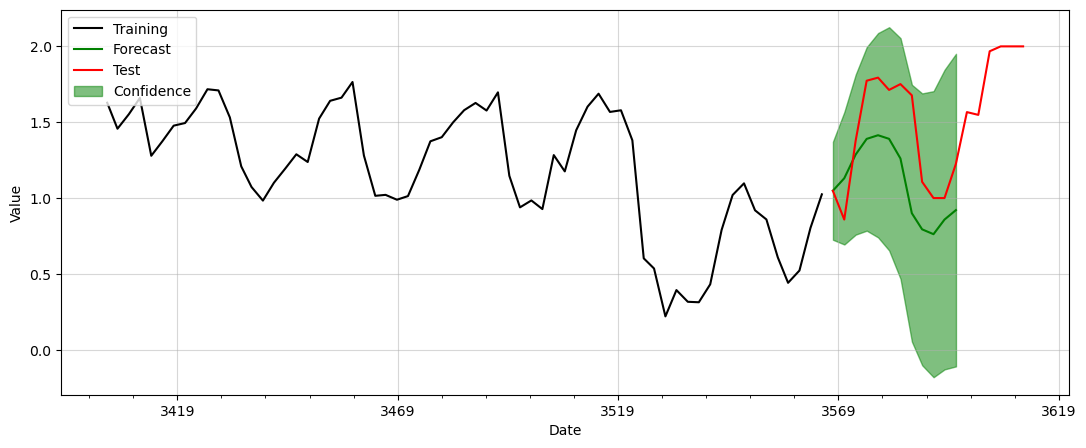

<Axes: xlabel='Date', ylabel='Value'>

In [48]:
sarimax_plot(train, predictions, test)

In [49]:
def time_ranges(timeseries):
    return timeseries.index[0], timeseries.index[-1]

In [50]:
def overlapping_range(timeseries1, timeseries2):
    range1 = time_ranges(timeseries1)
    range2 = time_ranges(timeseries2)
    min_range = range1[0] if range1[0] > range2[0] else range2[0]
    max_range = range1[1] if range1[1] < range2[1] else range2[1]
    return min_range, max_range

In [51]:
overlap_range = overlapping_range(test, predictions)
overlap_range

(Timestamp('2022-06-30 00:00:00-0500', tz='pytz.FixedOffset(-300)', freq='M'),
 Timestamp('2023-05-31 00:00:00-0500', tz='pytz.FixedOffset(-300)', freq='M'))

In [52]:
def measure_rmse(test,predictions):
    overlap_range = overlapping_range(test, predictions)
    return np.sqrt(mean_squared_error(
        test.loc[
            overlap_range[0].to_pydatetime()
            :
            overlap_range[1].to_pydatetime()
        ], 
        predictions["value"].loc[
            overlap_range[0].to_pydatetime()
            :
            overlap_range[1].to_pydatetime()
        ]
    ))

In [53]:
measure_rmse(test, predictions)

0.3640734568851986

In [7]:
from IPython.display import HTML

In [8]:
def display_full(target):
    return HTML(target.to_html())

In [9]:
display_full(datos_clima.resample("M").mean())

,Temp_Air_Mean,Temp_Air_Min,Temp_Air_Max,Dew_Temp_Mean,Relat_Hum_Mean,Relat_Hum_Min,Relat_Hum_Max,Wind_Speed_Mean,Wind_Speed_Min,Wind_Speed_Max
Date,,,,,,,,,,
2017-01-31 00:00:00-05:00,23.111429,20.658571,28.158571,19.691429,81.571429,61.714286,91.714286,1.628571,0.012857,5.177143
2017-02-28 00:00:00-05:00,23.357143,20.658571,28.644286,19.991429,82.142857,60.714286,93.142857,1.457143,0.000000,4.737143
2017-03-31 00:00:00-05:00,23.815714,20.912857,29.444286,20.008571,80.285714,57.714286,93.142857,1.552857,0.000000,5.331429
2017-04-30 00:00:00-05:00,23.364286,20.040000,28.928571,19.594286,80.285714,57.142857,93.428571,1.660000,0.000000,4.655714
2017-05-31 00:00:00-05:00,24.916667,21.537083,30.601250,21.516250,82.541667,57.541667,95.833333,1.278750,0.000000,4.889583
2017-06-30 00:00:00-05:00,23.928333,21.002917,28.612917,20.774583,83.583333,63.791667,94.416667,1.373750,0.000000,4.763333
2017-07-31 00:00:00-05:00,22.794231,19.585385,28.326923,19.474231,82.538462,61.076923,94.730769,1.477308,0.000000,4.881538
2017-08-31 00:00:00-05:00,23.228846,20.211538,29.493462,19.438462,80.346154,56.076923,92.923077,1.494615,0.000000,5.209231
2017-09-30 00:00:00-05:00,23.427500,20.001667,30.270833,19.215000,78.541667,52.541667,92.416667,1.590417,0.000000,5.380417
